**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv(r'F:\internship2020_kaggle\week2\task1\Data_Exploration_and_Cleaning\cleaned_data.csv')
df=df[~df.isin([np.nan,np.inf,-np.inf]).any(1)]

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [21]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [24]:
params = {'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [27]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rf, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=2,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [28]:
cv.fit(X_train,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.6s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s



[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.8s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.8s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.9s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.9s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   1.6s
[CV] 

[CV] ................... max_depth=12, n_estimators=200, total=   8.7s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   8.4s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   9.1s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   8.9s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  3.0min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [3, 6, 9, 12]

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [29]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.243321,0.133285,0.025558,0.035818,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.742632,0.740296,0.734786,0.751678,0.742348,0.006094,15,0.752465,0.758028,0.757912,0.749858,0.754566,0.003527
1,0.818250,0.044830,0.041333,0.010584,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.749709,0.748534,0.734019,0.760228,0.748122,0.009329,9,0.763280,0.761036,0.765081,0.758535,0.761983,0.002453
2,1.552670,0.027066,0.058588,0.006768,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.748247,0.749069,0.733463,0.760388,0.747792,0.009563,11,0.762888,0.761283,0.765145,0.759574,0.762222,0.002054
3,2.991359,0.042837,0.110089,0.001259,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.748212,0.750148,0.732929,0.761194,0.748121,0.010072,10,0.763225,0.762479,0.764699,0.758583,0.762246,0.002261
4,0.258444,0.006145,0.009501,0.005781,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.740263,0.753216,0.740787,0.751461,0.746432,0.005942,13,0.803208,0.804738,0.801773,0.794830,0.801137,0.003790
5,1.222809,0.032364,0.036759,0.009537,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.751369,0.756036,0.742714,0.765596,0.753929,0.008260,3,0.818104,0.815383,0.815517,0.811101,0.815026,0.002512
6,2.486990,0.142850,0.074778,0.013817,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.755013,0.756969,0.741887,0.766167,0.755009,0.008668,2,0.817505,0.816939,0.817036,0.813401,0.816220,0.001642
7,5.115891,0.213318,0.144227,0.033304,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.753874,0.757621,0.743729,0.767262,0.755621,0.008426,1,0.819048,0.818991,0.818620,0.815866,0.818131,0.001318
8,0.342629,0.010686,0.015627,0.000007,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.742177,0.747165,0.731884,0.759352,0.745145,0.009881,14,0.878067,0.872056,0.876196,0.868178,0.873624,0.003823
9,1.654441,0.030919,0.040394,0.015841,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.751850,0.749672,0.739892,0.760392,0.750452,0.007295,7,0.907955,0.902249,0.903240,0.896924,0.902592,0.003919


**Find the best hyperparameters from the cross-validation.**

In [31]:
cv.best_params_

{'max_depth': 6, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [36]:
# Create a 5x5 grid


max_deapth, n_estima = np.meshgrid([3,6,9,12], [10,50,100,200])
print(max_deapth)
print(n_estima)

[[ 3  6  9 12]
 [ 3  6  9 12]
 [ 3  6  9 12]
 [ 3  6  9 12]]
[[ 10  10  10  10]
 [ 50  50  50  50]
 [100 100 100 100]
 [200 200 200 200]]


In [44]:
# Set color map to `plt.cm.jet`
mean_test_score = np.array(cv_results_df['mean_test_score']).reshape(4,4)
print(mean_test_score)



[[0.74234809 0.74812228 0.74779157 0.74812093]
 [0.7464316  0.75392887 0.75500926 0.75562146]
 [0.74514454 0.75045156 0.75222652 0.75303971]
 [0.72927462 0.74748856 0.74953604 0.75058518]]


Text(0, 0.5, 'Y coordinate')

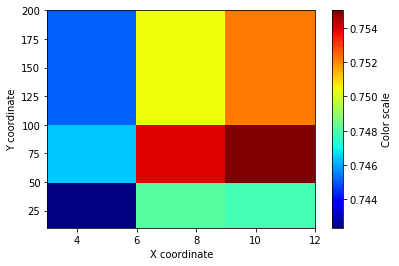

In [45]:
# Visualize pcolormesh
ax = plt.axes()
pcolor_ex = ax.pcolormesh(max_deapth,n_estima , mean_test_score, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [49]:
# Create a dataframe of the feature names and importance
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv.best_estimator_.feature_importances_
})
feat_imp_df

,Feature name,Importance
0,LIMIT_BAL,0.045190
1,EDUCATION,0.003828
2,MARRIAGE,0.002113
3,AGE,0.016905
4,PAY_1,0.514755
5,BILL_AMT1,0.035869
6,BILL_AMT2,0.032796
7,BILL_AMT3,0.033069
8,BILL_AMT4,0.029128
9,BILL_AMT5,0.023835


In [50]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.514755
11,PAY_AMT1,0.066764
12,PAY_AMT2,0.051833
0,LIMIT_BAL,0.045190
13,PAY_AMT3,0.040735
5,BILL_AMT1,0.035869
7,BILL_AMT3,0.033069
6,BILL_AMT2,0.032796
10,BILL_AMT6,0.029693
16,PAY_AMT6,0.029612
